<a href="https://colab.research.google.com/github/YRYoung/HPC/blob/main/Assigenment/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

* Write a Python function that takes *N* as an input and returns the matrix *A* and vector *f*.
* You should use an appropriate sparse storage format for the matrix *A*.

In [1]:
import numpy as np
from scipy.sparse import csr_matrix


def generate_mat(N):
    assert N >= 0
    if N == 0: return np.array([1]), np.array([1])

    f = np.concatenate([np.zeros(N), [1]], axis=0)

    A = np.zeros([N + 1, N + 1])
    for i in range(1, N):
        A[i, i - 1:i + 2] = [-1, 2. - (29 * 29 * np.pi * np.pi / 4 / N / N), -1]
    A[0, 0] = 1
    A[N, N] = 1

    f = csr_matrix(f)
    A = csr_matrix(A)
    # A = csc_matrix(A)

    return A, f


A, f = generate_mat(8)
print(A, '\n\n', f)

  (0, 0)	1.0
  (1, 0)	-1.0
  (1, 1)	-30.423192583266214
  (1, 2)	-1.0
  (2, 1)	-1.0
  (2, 2)	-30.423192583266214
  (2, 3)	-1.0
  (3, 2)	-1.0
  (3, 3)	-30.423192583266214
  (3, 4)	-1.0
  (4, 3)	-1.0
  (4, 4)	-30.423192583266214
  (4, 5)	-1.0
  (5, 4)	-1.0
  (5, 5)	-30.423192583266214
  (5, 6)	-1.0
  (6, 5)	-1.0
  (6, 6)	-30.423192583266214
  (6, 7)	-1.0
  (7, 6)	-1.0
  (7, 7)	-30.423192583266214
  (7, 8)	-1.0
  (8, 8)	1.0 

   (0, 8)	1.0


* compute the approximate solution for your problem for *N=10*, *N=100*, and *N=10*.
* Plot the solutions for these three values of *N*.



[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


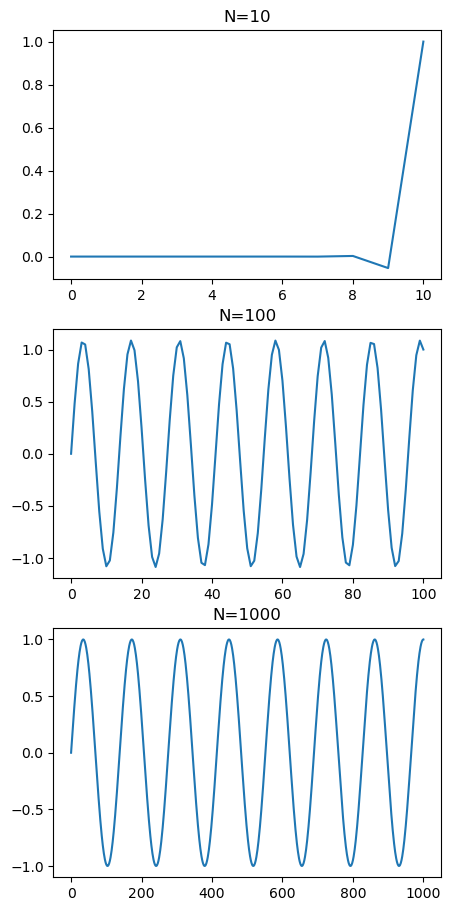

In [2]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

i = 0
fig, ax = plt.subplots(3, 1, figsize=(5, 11))
print(ax)

for N in [10, 100, 1000]:
    A, f = generate_mat(N)
    u = spsolve(A, f.T)

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x, u)
    ax[i].set_title('N=' + str(N))
    i = i + 1

plt.show()

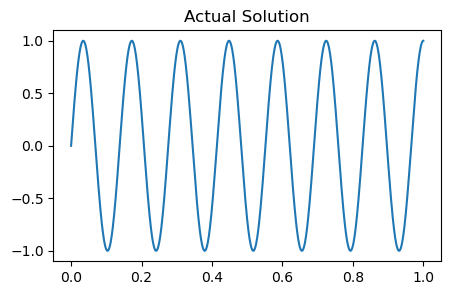

In [3]:
k = 29. * np.pi / 2.
x = np.linspace(0, 1, 1000)

u = np.sin(k * x)
plt.figure(figsize=(5, 3))
plt.plot(x, u)
plt.title('Actual Solution')
plt.show()

* Briefly (1-2 sentences) comment on your plots:

  + __How different__ are they to each other? 

  + Which do you expect to be **closest** to the actual solution of the wave problem?





Closest: N=1000

* Compute this error for a range of values for  of your choice, on axes that use log scales
* plot *N* against the error in your solution.

In [4]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 29. * np.pi / 2.
error = []
sizes = np.round(np.linspace(500, 6000, 40))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))
    u = spsolve(A, f.T)
    u_exact = np.sin(k * x)  #!!
    error.append(np.max(np.abs(u - u_exact)))

plt.plot(np.log10(error), np.log10(sizes))
plt.xlabel('log10(error)')
plt.ylabel('log10(N)')
ax = plt.gca()
plt.show()

print(sizes, '\n', error)

 45%|████▌     | 18/40 [00:00<00:00, 33.94it/s]


KeyboardInterrupt: 

* For the same values of *N*, measure the time taken to compute your approximations for both functions.
* On axes that both use log scales, plot *N* against the time taken to compute a solution.

In [ ]:

import matplotlib.pyplot as plt
from tqdm import tqdm
import timeit

k = 29. * np.pi / 2.
times = []
sizes = np.round(np.linspace(500, 6000, 40))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))

    t = timeit.Timer(lambda: spsolve(A, f.T)).timeit(110)

    times.append(t)

plt.plot(np.log10(times), np.log10(sizes))

plt.xlabel('log10(time)')
plt.ylabel('log10(N)')
plt.show()

* pick a value of that you would expect to give error of or 10<sup>-8</sup> less.
* Briefly (1-2 sentences) explain how you picked your value of *N*
* predict how long the computation will take

In [ ]:
from sympy import symbols, solve
import math

log_time = np.log10(times)
log_error = np.log10(error)
log_size = np.log10(sizes)

f1 = np.polyfit(log_error, log_size, 1)
print('Fit function of log_error & log_size:', np.poly1d(f1))

x = symbols('x')
a = solve(f1[0] * x + f1[1] < -8)
print('\nInequation:\n', a)
result_logN = a.args[0].args[0]
result_N = math.ceil(math.pow(10., result_logN))
print('\nExpected minimum value of N that satisfies the given condition:\n', result_N)

f2 = np.polyfit(log_size, log_time, 1)
print('\nFit function of log_size & log_time:', np.poly1d(f2))

x_time = math.pow(10., f2[0] * result_logN + f2[1])
print('\nExpected computation time:\n{:.0f}'.format(x_time))

# Part2

* Implement this iterative scheme in Python.
    * You should implement this as a function that takes as an input.

In [ ]:
import numpy as np

param = 1000


def generate_tem_mat(N):
    nelements = ((N - 1) ** 2 + N - 1) * 4 + (N + 1) * 3 - 2
    row_ind = np.zeros(nelements, dtype=np.float64)
    col_ind = np.zeros(nelements, dtype=np.float64)
    data = np.zeros(nelements, dtype=np.float64)

    f = np.zeros((N + 1) ** 2, dtype=np.float64)
    n = 0
    for i in range(N + 1):
        for j in range(N + 1):
            location = j * (N + 1) + i

            if i == 0 or i == N or j == 0:
                row_ind[n] = col_ind[n] = location
                data[n] = 1
                f[location] = 10 if i == 0 or i == N else 0
                n += 1
            else:
                row_ind[n:n + 4] = location
                col_ind[n:n + 4] = [location - (N + 2),
                                    location - (N + 1),
                                    location - N,
                                    location]
                data[n:n + 4] = [-N / param,
                                 -1 + N / (param / 2),
                                 -N / param,
                                 1]
                f[location] = 0
                n += 4

    return coo_matrix((data, (row_ind, col_ind)), shape=((N + 1) ** 2, (N + 1) ** 2)).tocsr(), f

Test for a single *N*

In [ ]:
from scipy.sparse.linalg import spsolve

N = 5
A, f = generate_tem_mat(N)
u = spsolve(A, f).reshape((N + 1, N + 1))
print(u)

In [ ]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

t = 10

Ns = [499, 500, 511]
fig, ax = plt.subplots(len(Ns), 1, figsize=(7, len(Ns) * 3))
for i, N in enumerate(Ns):
    A, f = generate_tem_mat(N)
    u = spsolve(A, f).reshape((N + 1, N + 1))

    # print(u[i,:] for i in range(u.shape[0]))

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x / N, u[:, t], 'c+-')
    # ax[i].plot(x, u[t - 1:len(u):N + 1])
    ax[i].set_title('N=' + str(N))

plt.show()

In [ ]:
% matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm

from scipy.sparse.linalg import spsolve

N = 200

A, f = generate_tem_mat(N)
sol = spsolve(A, f)

u = sol.reshape((N + 1, N + 1)).T

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ticks = np.linspace(0, 1, N + 1)
X, Y = np.meshgrid(ticks, ticks)
surf = ax.plot_surface(X, Y, u, antialiased=False, cmap=cm.coolwarm)
plt.show()

* plot the temperature of the rod at *t=1, t=2* and *t=10* .

In [ ]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

Ts = [1, 2, 10]
N = 500

fig, ax = plt.subplots(len(Ts), 1, figsize=(7, len(Ts) * 3.5))
for i, t in enumerate(Ts):
    A, f = generate_tem_mat(N)
    u = spsolve(A, f).reshape((N + 1, N + 1))

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x / N, u[:, t], 'c+-')
    # ax[i].plot(x, u[t - 1:len(u):N + 1])
    ax[i].set_title('t=' + str(t))

plt.show()

* Briefly (1-2 sentences) comment on how you picked a value for *N*.

* Use numba.cuda to parallelize your implementation on a GPU
    * think carefully about when data needs to be copied, and be careful not to copy data to/from the GPU when not needed.

In [1]:
from numba import cuda
import numba
import numpy as np
from scipy.sparse import coo_matrix
import math

param = 1000
N = 200

nelements = ((N - 1) ** 2 + N - 1) * 4 + (N + 1) * 3 - 2
totalelements = (N + 1) ** 2

t_per_block = 30  # <=32
t_per_block_4 = t_per_block * 4

block_per_grid = int(math.ceil((N + 1) / t_per_block))

blocks = (block_per_grid, block_per_grid)
threads = (t_per_block, t_per_block)


@cuda.jit
def generate_tem_mat_cuda(N, rows, cols, data, f):
    local_row = cuda.shared.array(shape=t_per_block_4, dtype=numba.int64)
    local_col = cuda.shared.array(shape=t_per_block_4, dtype=numba.int64)
    local_data = cuda.shared.array(shape=t_per_block_4, dtype=numba.float32)

    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y

    px = cuda.blockIdx.x * cuda.blockDim.x + tx
    py = cuda.blockIdx.y * cuda.blockDim.y + ty

    if px > N or py > N: return

    rank_in_grid = py * (N + 1) + px
    rank_in_block_4 = (ty * t_per_block + tx) * 4


    cuda.syncthreads()
    local_row[(ty * t_per_block + tx) * 4] = rank_in_grid
    # if px == 0 or px == N or py == 0:
    #     local_row[rank_in_block_4] = local_col[rank_in_block_4] = rank_in_grid
    # local_data[rank_in_block_4] = 1.
    # f[rank_in_grid] = 10 if px == 0 or px == N else 0

    # else:
    #     for i in range(4):
    #         local_row[rank_in_block_4 + i] = rank_in_grid
    #         local_col[rank_in_block_4 + i] = rank_in_grid if i == 3 else rank_in_grid - (N + 2) + i

    # local_data[rank_in_block_4] = local_data[rank_in_block_4 + 2] = -N / param
    # local_data[rank_in_block_4+ 1] = -1 + N / (param / 2)
    # local_data[rank_in_block_4+ 3] = 1
    # f[rank_in_grid] = 0

    # cuda.syncthreads()







In [2]:
cuda.detect()
a = cuda.device_array(shape=(2, 2), dtype=np.float32)
print('成功初始化')


Found 1 CUDA devices
id 0    b'NVIDIA GeForce RTX 3070 Laptop GPU'                              [SUPPORTED]
                      Compute Capability: 8.6
                           PCI Device ID: 0
                              PCI Bus ID: 1
                                    UUID: GPU-c45229f2-1f33-55e7-465d-395a04c8765d
                                Watchdog: Enabled
                            Compute Mode: WDDM
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported
成功初始化


In [3]:
rows = cuda.device_array(shape=nelements, dtype=np.int64)
cols = cuda.device_array(shape=nelements, dtype=np.int64)

data = cuda.device_array(shape=nelements, dtype=np.float32)
f = cuda.device_array(shape=(N + 1) ** 2, dtype=np.float32)

print('blocks/grid: {}\nthreads/block: {}'.format(block_per_grid ** 2, t_per_block ** 2))

generate_tem_mat_cuda[blocks, threads](N, rows, cols, data, f)

cpu_rows = rows.copy_to_host()
cpu_cols = cols.copy_to_host()
cpu_data = data.copy_to_host()
cpu_f = f.copy_to_host()

print('结束')


blocks/grid: 49
threads/block: 900


D:\ProgramData\Anaconda3\envs\new\lib\site-packages\numba\cuda\compiler.py:726: NumbaPerformanceWarning: Grid size (49) < 2 * SM count (80) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


CudaAPIError: [719] Call to cuMemcpyDtoH results in CUDA_ERROR_LAUNCH_FAILED

In [ ]:
print(global_count.copy_to_host())

In [ ]:
A = coo_matrix((cpu_data, (cpu_rows, cpu_cols)),
               shape=((N + 1) ** 2, (N + 1) ** 2)).tocsr()

AA, f = generate_tem_mat(N)
A = A.toarray()
AA = AA.toarray()

In [ ]:
% matplotlib inline
from matplotlib import pyplot as plt
from scipy.sparse.linalg import spsolve

N = 200
A, f = generate_tem_mat(N)
sol = spsolve(A, f)

u = sol.reshape((N + 1, N + 1)).T

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ticks = np.linspace(0, 1, N + 1)
X, Y = np.meshgrid(ticks, ticks)
surf = ax.plot_surface(X, Y, u, antialiased=False, cmap=cm.coolwarm)
plt.show()